In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestRegressor

In [2]:
df1=pd.read_csv("finalcsvforageandstate1.csv")

In [3]:
df1=df1[["Date","Age_Bracket","State/UnionTerritory","Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","Confirmed","ChangePercent","vulnareable"]]

In [4]:
df1

,Date,Age_Bracket,State/UnionTerritory,Sno,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,ChangePercent,vulnareable
0,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
1,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
2,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
3,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
4,2020-04-03,55,Haryana,598.0,6:00 PM,-,-,24.0,0.0,49.0,0.750000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
98365,2020-06-08,58,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98366,2020-06-08,69,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98367,2020-06-08,80,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2
98368,2020-06-08,52,Karnataka,2790.0,8:00 AM,-,-,2132.0,61.0,5452.0,1.152388,2


In [5]:
df1=df1[['Age_Bracket','State/UnionTerritory','vulnareable']]

In [6]:
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()
df1['State/UnionTerritory_cat']=le.fit_transform(df1['State/UnionTerritory'])

C:\Users\Devanand\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
df1

,Age_Bracket,State/UnionTerritory,vulnareable,State/UnionTerritory_cat
0,55,Haryana,2,9
1,55,Haryana,2,9
2,55,Haryana,2,9
3,55,Haryana,2,9
4,55,Haryana,2,9
...,...,...,...,...
98365,58,Karnataka,2,13
98366,69,Karnataka,2,13
98367,80,Karnataka,2,13
98368,52,Karnataka,2,13


In [8]:
df1.to_csv("processed.csv")

In [9]:
df1=df1[['Age_Bracket','State/UnionTerritory_cat','vulnareable']]

In [10]:
k=df1[df1[['Age_Bracket']].apply(lambda x: x[0].isdigit() or x[0].replace('.', '', 1).isdigit(), axis=1)]

In [11]:
k

,Age_Bracket,State/UnionTerritory_cat,vulnareable
0,55,9,2
1,55,9,2
2,55,9,2
3,55,9,2
4,55,9,2
...,...,...,...
98365,58,13,2
98366,69,13,2
98367,80,13,2
98368,52,13,2


In [12]:
a=k[k['vulnareable']==2]#64847
b=k[k['vulnareable']==1]#15926
c=k[k['vulnareable']==0]#17581

In [13]:
a=a[:15926]

In [14]:
a

,Age_Bracket,State/UnionTerritory_cat,vulnareable
0,55,9,2
1,55,9,2
2,55,9,2
3,55,9,2
4,55,9,2
...,...,...,...
22131,18.0,13,2
22132,30.0,13,2
22133,42.0,13,2
22134,45.0,13,2


In [15]:
b=b[:15926]

In [16]:
c=c[:15926]

In [17]:
k1=a.append(b)

In [18]:
k2=k1.append(c)

In [19]:
k2

,Age_Bracket,State/UnionTerritory_cat,vulnareable
0,55,9,2
1,55,9,2
2,55,9,2
3,55,9,2
4,55,9,2
...,...,...,...
62329,43,13,0
62330,27,13,0
62331,65,13,0
62332,57,13,0


In [20]:
k2.loc[k2["vulnareable"]==1]

,Age_Bracket,State/UnionTerritory_cat,vulnareable
21,45,24,1
29,46,13,1
30,3,14,1
35,96,14,1
36,89,14,1
...,...,...,...
98261,70,13,1
98262,65,13,1
98263,65,13,1
98264,70,13,1


In [21]:
df = k2.astype({"Age_Bracket": float, "State/UnionTerritory_cat": float,"vulnareable": float})

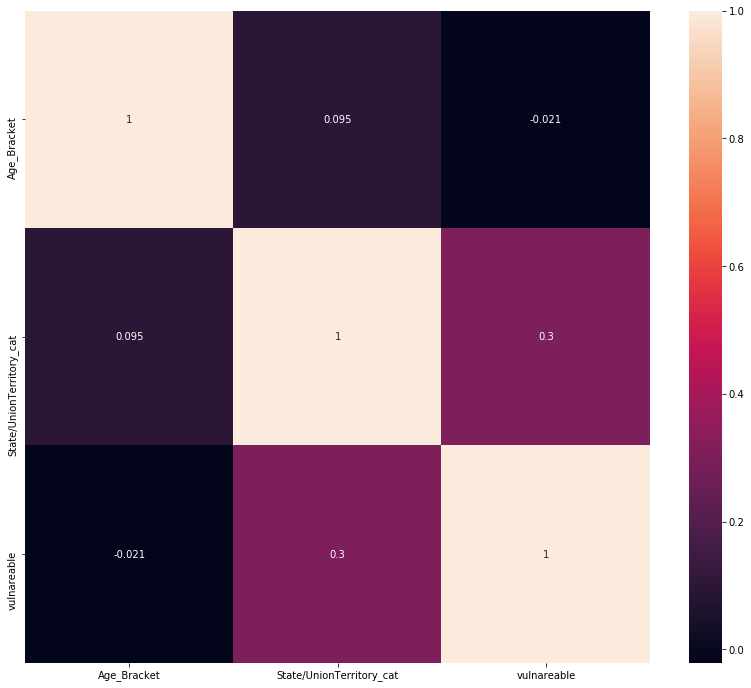

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
x = df[['Age_Bracket','State/UnionTerritory_cat']]#Independent Variable
y = df['vulnareable']# Dependent Variable
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.25)

In [24]:
from sklearn.linear_model import LogisticRegression#(logistic Fuction)

lr = LogisticRegression()

lr.fit(x_train,y_train)

Y_pred_lr = lr.predict(x_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
score_lr

51.34

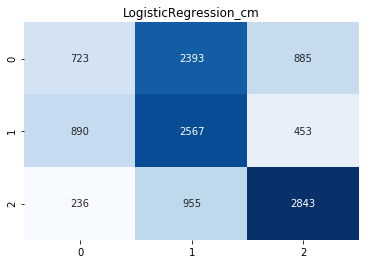

In [25]:
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 53.28 %


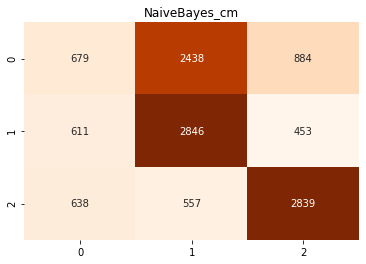

In [27]:
nb_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("NaiveBayes_cm")
sns.heatmap(nb_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)

In [28]:
from sklearn import svm

sv = svm.SVC(kernel='rbf')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using RBF SVM is: "+str(score_svm)+" %")

The accuracy score achieved using RBF SVM is: 53.62 %


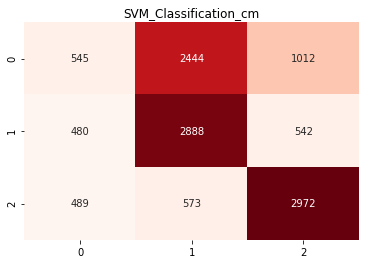

In [29]:
sv_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM_Classification_cm")
sns.heatmap(sv_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

In [30]:
# from sklearn import svm

# sv1 = svm.SVC(kernel='poly')

# sv1.fit(x_train, y_train)

# Y_pred_svm = sv1.predict(x_test)
# score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

# print("The accuracy score achieved using Poly SVM is: "+str(score_svm)+" %")

In [31]:
# sv_cm=confusion_matrix(y_test,Y_pred_svm)
# plt.title("SVM_Classification_cm")
# sns.heatmap(sv_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
pred_y_4 = clf_4.predict(x_test)


In [33]:
print(accuracy_score(y_test, pred_y_4))
score_svm = round(accuracy_score(pred_y_4,y_test)*100,2)

0.5416492256174131


In [34]:
print("The accuracy score achieved using Random Forest is: "+str(score_svm)+" %")

The accuracy score achieved using Random Forest is: 54.16 %


# Code testing

In [35]:
import pickle
with open('lr_pickle1', 'wb') as f:
    pickle.dump(lr,f)
    
if __name__=='__main__':
    with open('lr_pickle1', 'rb') as f:
        Naive_users = pickle.load(f)
        
#nb = Naive_users.predict(Train_X_Tfidf)
#print(nb)

In [36]:
import pickle
with open('nb_pickle1', 'wb') as f:
    pickle.dump(nb,f)
    
if __name__=='__main__':
    with open('nb_pickle1', 'rb') as f:
        Naive_users = pickle.load(f)
        
#nb = Naive_users.predict(Train_X_Tfidf)
#print(nb)

In [37]:
import pickle
with open('svm_pickle1', 'wb') as f:
    pickle.dump(sv,f)
    
if __name__=='__main__':
    with open('svm_pickle1', 'rb') as f:
        Naive_users = pickle.load(f)
        
#nb = Naive_users.predict(Train_X_Tfidf)
#print(nb)

In [38]:
import pickle
with open('rf_pickle1', 'wb') as f:
    pickle.dump(clf_4,f)
    
if __name__=='__main__':
    with open('rf_pickle1', 'rb') as f:
        Naive_users = pickle.load(f)
        
#nb = Naive_users.predict(Train_X_Tfidf)
#print(nb)

In [39]:
# Age_Bracket = 55
# State_UnionTerritory_cat = 9
# vulnareable = 2

# Age_Bracket = 45
# State_UnionTerritory_cat = 24

Age_Bracket = 46
State_UnionTerritory_cat = 13

# Age_Bracket = 3
# State_UnionTerritory_cat = 14
# vulnareable = 1



dfd = {"Age_Bracket" : Age_Bracket,
"State_UnionTerritory_cat" : State_UnionTerritory_cat}

In [40]:
new = pd.DataFrame(dfd, index=[0])
new

,Age_Bracket,State_UnionTerritory_cat
0,46,13


In [41]:
with open('lr_pickle1', 'rb') as f:
    lrpic = pickle.load(f)
    
lrpic=lrpic.predict(new)
print("lrpic")
print(int(lrpic))
# lr_output=pred_logistic[0]
# lr_output
    
with open('nb_pickle1', 'rb') as f:
    nbpic = pickle.load(f)
        
nbpic=nbpic.predict(new)
print("nbpic")
print(int(nbpic))
# lr_output=pred_logistic[0]
# lr_output
        
with open('svm_pickle1', 'rb') as f:
    svmpic = pickle.load(f)
        
svmpic=svmpic.predict(new)
print("svmpic")
print(int(svmpic))
# lr_output=pred_logistic[0]
# lr_output
        
with open('rf_pickle1', 'rb') as f:
    rfpic = pickle.load(f)

rfpic=rfpic.predict(new)
print("rfpic")
print(int(rfpic))
# lr_output=pred_logistic[0]
# lr_output

lrpic
1
nbpic
1
svmpic
1
rfpic
1


In [42]:
# pred_logistic=modl.predict(new)
# print(pred_logistic)
# lr_output=pred_logistic[0]
# lr_output